In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read the CSV file into the Data dataframe
Data = pd.read_csv(r"C:\Users\daddy\OneDrive\Documents\Book1.csv", low_memory=True)

# Filter out rows containing the keywords "WIRE," "CABLE," or "CONDUCTOR" as the first word following "SIN" and then its six digits
filtered_data = Data[Data['Description'].str.contains(r'SIN\s\d{6}\s(WIRE|CABLE|CONDUCTOR)', case=False, na=False)]

# Remove the filtered rows from the Data dataframe
Data = Data[~Data['Description'].str.contains('WIRE|CABLE|CONDUCTOR', case=False, na=False)]

# Convert 'Qty. Ordered' column to numeric type
Data['Qty. Ordered'] = Data['Qty. Ordered'].str.replace(',', '').astype(float)
filtered_data['Qty. Ordered'] = filtered_data['Qty. Ordered'].str.replace(',', '').astype(float)

# Add a new column "Sales Count" that contains the count of entries for every sample in the "Item" column
Data['Sales Count'] = Data.groupby('Item')['Item'].transform('count')
filtered_data['Sales Count'] = filtered_data.groupby('Item')['Item'].transform('count')

# Calculate the sum of "Qty. Ordered" for each unique item sample and assign the values to a new column "Qty. Ordered Count"
Data['Qty. Ordered Count'] = Data.groupby('Item')['Qty. Ordered'].transform('sum')
filtered_data['Qty. Ordered Count'] = filtered_data.groupby('Item')['Qty. Ordered'].transform('sum')

# Delete rows where 'Qty Ordered' is less than 0 in both Data and filtered_data DataFrames
Data = Data[Data['Qty. Ordered'] >= 1]
filtered_data = filtered_data[filtered_data['Qty. Ordered'] >= 1]

# Reset the index of the Data and filtered_data DataFrames
Data.reset_index(drop=True, inplace=True)
filtered_data.reset_index(drop=True, inplace=True)
# Convert 'VLOOKUP' column to numeric type after removing non-numeric entries
Data['VLOOKUP'] = pd.to_numeric(Data['VLOOKUP'], errors='coerce')
filtered_data['VLOOKUP'] = pd.to_numeric(filtered_data['VLOOKUP'], errors='coerce')

# Calculate the average of VLOOKUP values in the 'VLOOKUP' column for each unique sample in the 'Item' column
Data['Average Lead Time'] = Data.groupby('Item')['VLOOKUP'].transform('mean')
filtered_data['Average Lead Time'] = filtered_data.groupby('Item')['VLOOKUP'].transform('mean')
#Print descriptive statistics for vital and important information to company operational costs
print("BELOW ARE THE DESCRIPTIVE STATISTICS FOR THE QUANTITY ORDERED SUM ACROSS ALL THE DATA EXCLUDING WIRE/CABLE/CONDUCTOR SAMPLES")
print(Data['Qty. Ordered Count'].describe())
print("BELOW ARE THE DESCRIPTIVE STATISTICS FOR THE SALES ORDER SUM ACROSS ALL THE DATA EXCLUDING WIRE/CABLE/CONDUCTOR SAMPLES")
print(Data['Sales Count'].describe())
print("BELOW ARE THE DESCRIPTIVE STATISTICS FOR THE AVERAGE LEAD TIME ACROSS ALL THE DATA EXCLUDING WIRE/CABLE/CONDUCTOR SAMPLES")
print(Data['Average Lead Time'].describe())
print("BELOW ARE THE DESCRIPTIVE STATISTICS FOR THE QUANTITY ORDERED SUM ACROSS ALL THE DATA FOR ONLY WIRE/CABLE/CONDUCTOR SAMPLES")
print(filtered_data['Qty. Ordered Count'].describe().apply(lambda x: format(x, '.2f')))
print("BELOW ARE THE DESCRIPTIVE STATISTICS FOR THE SALES COUNT SUM ACROSS ALL THE DATA FOR ONLY WIRE/CABLE/CONDUCTOR SAMPLES")
print(filtered_data['Sales Count'].describe())
print("BELOW ARE THE DESCRIPTIVE STATISTICS FOR THE AVERAGE LEAD TIME ACROSS ALL THE DATA FOR ONLY WIRE/CABLE/CONDUCTOR SAMPLES")
print(filtered_data['Average Lead Time'].describe())

C:\Users\daddy\AppData\Local\Temp\ipykernel_19392\457643067.py:5: DtypeWarning: Columns (13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv(r"C:\Users\daddy\OneDrive\Documents\Book1.csv", low_memory=True)
C:\Users\daddy\AppData\Local\Temp\ipykernel_19392\457643067.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_data = Data[Data['Description'].str.contains(r'SIN\s\d{6}\s(WIRE|CABLE|CONDUCTOR)', case=False, na=False)]


BELOW ARE THE DESCRIPTIVE STATISTICS FOR THE QUANTITY ORDERED SUM ACROSS ALL THE DATA EXCLUDING WIRE/CABLE/CONDUCTOR SAMPLES
count     41062.000000
mean       5362.538625
std       13576.911347
min         -13.000000
25%         148.000000
50%        1114.000000
75%        4474.000000
max      153985.000000
Name: Qty. Ordered Count, dtype: float64
BELOW ARE THE DESCRIPTIVE STATISTICS FOR THE SALES ORDER SUM ACROSS ALL THE DATA EXCLUDING WIRE/CABLE/CONDUCTOR SAMPLES
count    41062.000000
mean        95.619040
std         91.891394
min          1.000000
25%         20.000000
50%         59.000000
75%        163.000000
max        352.000000
Name: Sales Count, dtype: float64
BELOW ARE THE DESCRIPTIVE STATISTICS FOR THE AVERAGE LEAD TIME ACROSS ALL THE DATA EXCLUDING WIRE/CABLE/CONDUCTOR SAMPLES
count    40992.000000
mean        42.484540
std         25.743428
min          0.000000
25%         25.766990
50%         37.254237
75%         51.650000
max        365.000000
Name: Average Lead Tim

Quantity Ordered Sum (Excluding Wire/Cable/Conductor Samples)
There are 41,062 data points in this group.
The average quantity of items ordered is about 5,362.
The data varies quite a bit from the average, with a standard deviation of approximately 13,577.
The smallest quantity ordered is -13
25% of the data points have quantities less than 148.
50% of the data points have quantities less than 1,114 (this is the median).
75% of the data points have quantities less than 4,474.
The largest quantity ordered is 153,985.

Sales Order Sum (Excluding Wire/Cable/Conductor Samples)
There are also 41,062 data points in this group.
The average sales order sum is about 95.62 units.
The data varies with a standard deviation of around 91.89.
The smallest sales order sum is 1 unit.
25% of the data points have sales order sums less than 20 units.
50% of the data points have sales order sums less than 59 units (this is the median).
75% of the data points have sales order sums less than 163 units.
The largest sales order sum is 352 units.

Average Lead Time (Excluding Wire/Cable/Conductor Samples)
There are 40,992 data points in this group.
The average lead time is about 42.48 units.
The lead time varies with a standard deviation of approximately 25.74.
The shortest lead time is 0 units (possibly for instant tasks).
25% of the data points have lead times less than 25.77 units.
50% of the data points have lead times less than 37.25 units (this is the median).
75% of the data points have lead times less than 51.65 units.
The longest lead time is 365 units.

Quantity Ordered Sum (Only for Wire/Cable/Conductor Samples)
There are 3,092 data points in this group (specific to wire/cable/conductor samples).
The average quantity of wire/cable/conductor items ordered is about 250,954.93 (quite high!).
The data varies significantly with a standard deviation of around 479,396.82.
The smallest quantity ordered is 1 (the smallest possible value).
25% of the data points have quantities less than 37,989.
50% of the data points have quantities less than 122,719 (this is the median).
75% of the data points have quantities less than 310,510.
The largest quantity ordered is a huge 2,554,800.

Sales Count Sum (Only for Wire/Cable/Conductor Samples)
There are 3,092 data points in this group (specific to wire/cable/conductor samples).
The average sales count sum is about 132.52 units.
The data varies with a standard deviation of approximately 109.57.
The smallest sales count sum is 1 unit.
25% of the data points have sales count sums less than 40 units.
50% of the data points have sales count sums less than 78 units (this is the median).
75% of the data points have sales count sums less than 245 units.
The largest sales count sum is 329 units.

Average Lead Time (Only for Wire/Cable/Conductor Samples)
There are 3,091 data points in this group (specific to wire/cable/conductor samples).
The average lead time is about 44.36 units.
The lead time varies with a standard deviation of approximately 16.42.
The shortest lead time is 0 units (possibly for instant tasks).
25% of the data points have lead times less than 36.05 units.
50% of the data points have lead times less than 45.92 units (this is the median).
75% of the data points have lead times less than 49.23 units.
The longest lead time is 197 units.

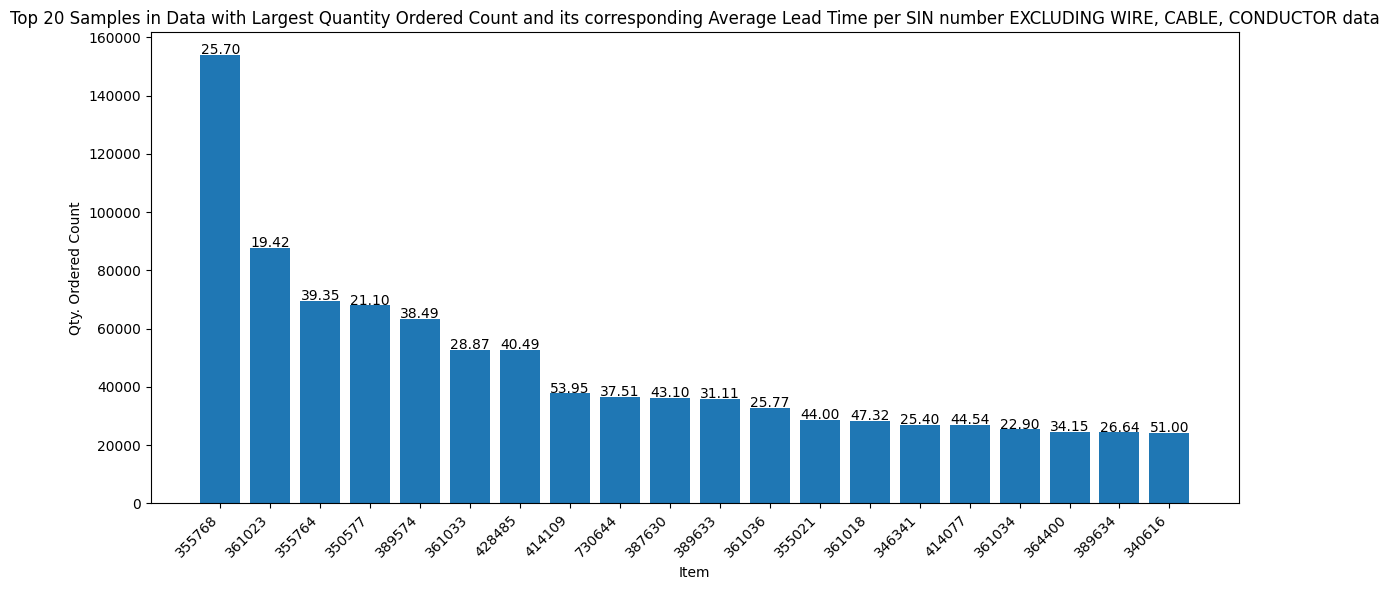

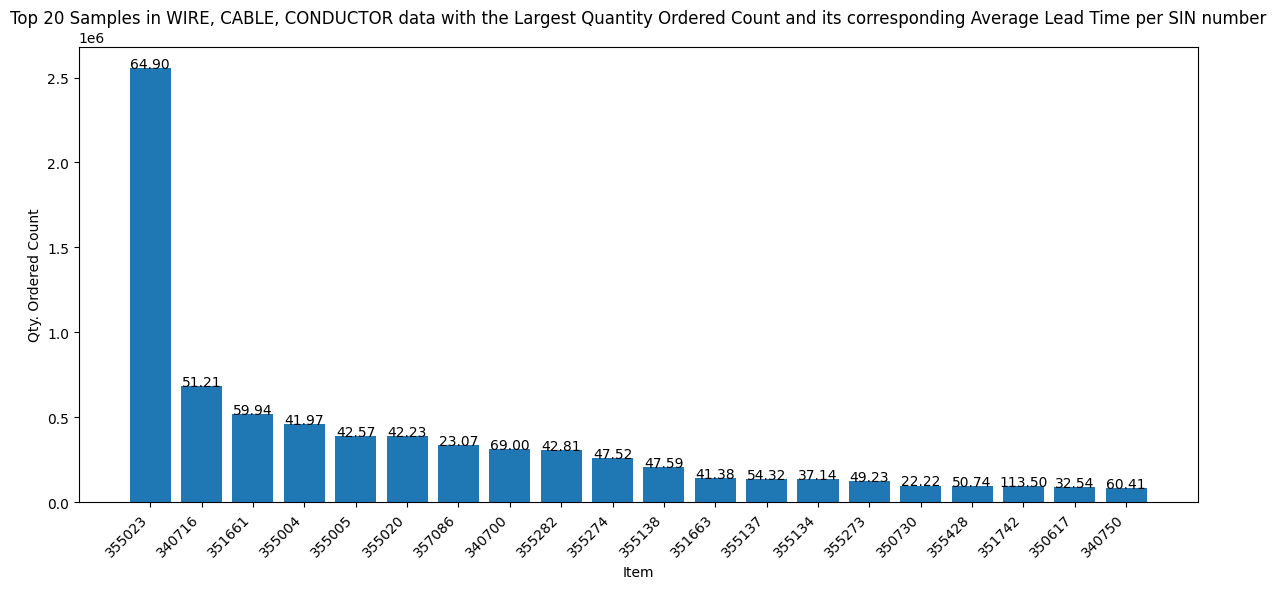

In [2]:
# Drop duplicates based on the 'Item' column
Data.drop_duplicates(subset='Item', keep='first', inplace=True)
filtered_data.drop_duplicates(subset='Item', keep='first', inplace=True)

# Reset the index of the Data and filtered_data DataFrames
Data.reset_index(drop=True, inplace=True)
filtered_data.reset_index(drop=True, inplace=True)
# Get the samples with the largest 'Qty. Ordered Count' for both dataframes
top_samples_data = Data.nlargest(20, 'Qty. Ordered Count')
top_samples_filtered_data = filtered_data.nlargest(20, 'Qty. Ordered Count')

# Create a bar chart for Dataframe containing the top 20 Quantity Ordered Count per SIN number EXCLUDING all sample entries for wire, cables and conductors
plt.figure(figsize=(12, 6))
plt.bar(top_samples_data['Item'], top_samples_data['Qty. Ordered Count'])
plt.xticks(rotation=45, ha='right')

# Overlay the 'Average Lead Time' above each bar for the WIRE/CABLE/CONDUCTOR excluded dataframe
for index, value in enumerate(top_samples_data['Average Lead Time']):
    plt.text(index, top_samples_data['Qty. Ordered Count'].iloc[index] + 200, f'{value:.2f}', ha='center')

plt.xlabel('Item')
plt.ylabel('Qty. Ordered Count')
plt.title('Top 20 Samples in Data with Largest Quantity Ordered Count and its corresponding Average Lead Time per SIN number EXCLUDING WIRE, CABLE, CONDUCTOR data')
plt.tight_layout()
plt.show()

# Create a bar chart for the filtered dataframe containing the top 20 Quantity Ordered Count per SIN number for ONLY the sample entries for wire, cables and conductors
plt.figure(figsize=(12, 6))
plt.bar(top_samples_filtered_data['Item'], top_samples_filtered_data['Qty. Ordered Count'])
plt.xticks(rotation=45, ha='right')

# Overlay the 'Average Lead Time' above each bar for the WIRE/CABLE/CONDUCTOR ONLY dataframe
for index, value in enumerate(top_samples_filtered_data['Average Lead Time']):
    plt.text(index, top_samples_filtered_data['Qty. Ordered Count'].iloc[index] + 200, f'{value:.2f}', ha='center')

plt.xlabel('Item')
plt.ylabel('Qty. Ordered Count')
plt.title('Top 20 Samples in WIRE, CABLE, CONDUCTOR data with the Largest Quantity Ordered Count and its corresponding Average Lead Time per SIN number')
plt.tight_layout()
plt.show()

In [4]:
# Read the CSV file into the Data dataframe
Data = pd.read_csv(r"C:\Users\daddy\OneDrive\Documents\Book1.csv", low_memory=True)

# Filter out rows containing the keywords "WIRE," "CABLE," or "CONDUCTOR" as the first word following "SIN" and then its six digits
filtered_data = Data[Data['Description'].str.contains(r'SIN\s\d{6}\s(WIRE|CABLE|CONDUCTOR)', case=False, na=False)]

# Remove the filtered rows from the Data dataframe
Data = Data[~Data['Description'].str.contains('WIRE|CABLE|CONDUCTOR', case=False, na=False)]

# Convert 'Qty. Ordered' column to numeric type
Data['Qty. Ordered'] = Data['Qty. Ordered'].str.replace(',', '').astype(float)
filtered_data['Qty. Ordered'] = filtered_data['Qty. Ordered'].str.replace(',', '').astype(float)

# Add a new column "Sales Count" that contains the count of entries for every sample in the "Item" column
Data['Sales Count'] = Data.groupby('Item')['Item'].transform('count')
filtered_data['Sales Count'] = filtered_data.groupby('Item')['Item'].transform('count')

# Calculate the sum of "Qty. Ordered" for each unique item sample and assign the values to a new column "Qty. Ordered Count"
Data['Qty. Ordered Count'] = Data.groupby('Item')['Qty. Ordered'].transform('sum')
filtered_data['Qty. Ordered Count'] = filtered_data.groupby('Item')['Qty. Ordered'].transform('sum')

# Delete rows where 'Qty Ordered' is less than 0 in both Data and filtered_data DataFrames
Data = Data[Data['Qty. Ordered'] >= 1]
filtered_data = filtered_data[filtered_data['Qty. Ordered'] >= 1]

# Reset the index of the Data and filtered_data DataFrames
Data.reset_index(drop=True, inplace=True)
filtered_data.reset_index(drop=True, inplace=True)
# Convert 'VLOOKUP' column to numeric type after removing non-numeric entries
Data['VLOOKUP'] = pd.to_numeric(Data['VLOOKUP'], errors='coerce')
filtered_data['VLOOKUP'] = pd.to_numeric(filtered_data['VLOOKUP'], errors='coerce')

# Calculate the average of VLOOKUP values in the 'VLOOKUP' column for each unique sample in the 'Item' column
Data['Average Lead Time'] = Data.groupby('Item')['VLOOKUP'].transform('mean')
filtered_data['Average Lead Time'] = filtered_data.groupby('Item')['VLOOKUP'].transform('mean')

C:\Users\daddy\AppData\Local\Temp\ipykernel_19392\1200689361.py:2: DtypeWarning: Columns (13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv(r"C:\Users\daddy\OneDrive\Documents\Book1.csv", low_memory=True)
C:\Users\daddy\AppData\Local\Temp\ipykernel_19392\1200689361.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_data = Data[Data['Description'].str.contains(r'SIN\s\d{6}\s(WIRE|CABLE|CONDUCTOR)', case=False, na=False)]


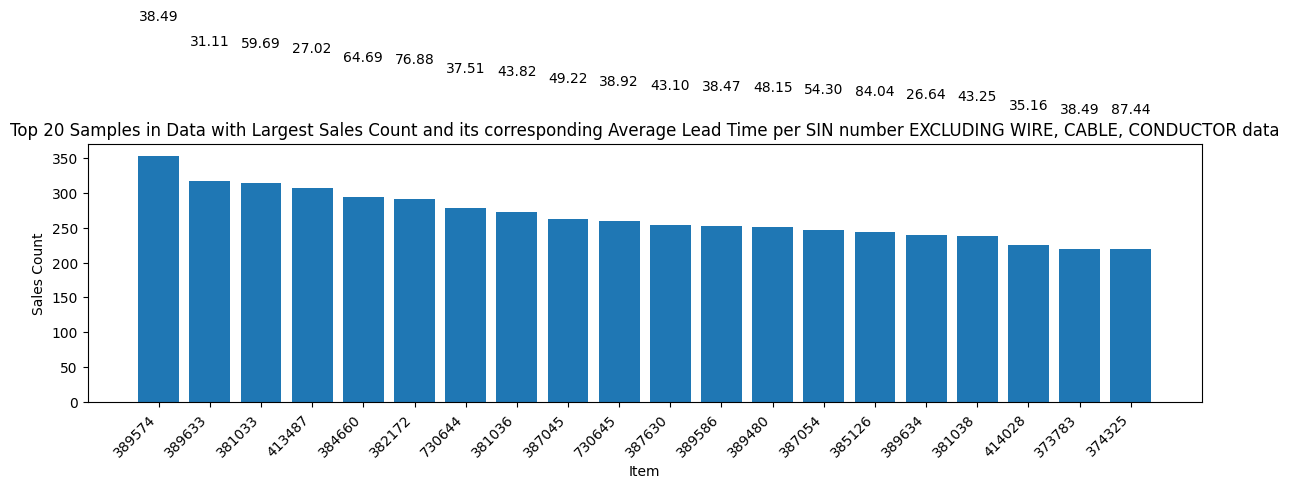

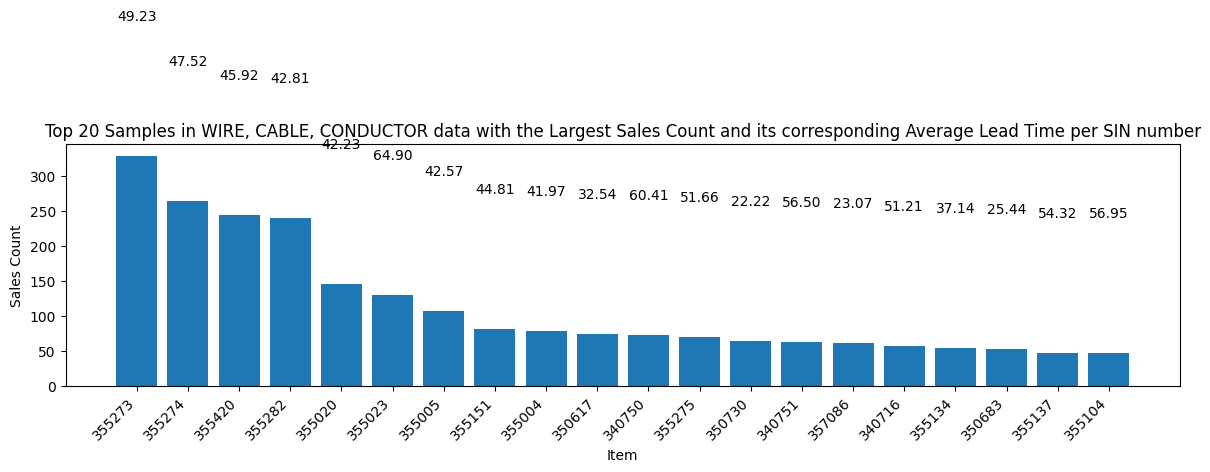

In [10]:
# Drop duplicates based on the 'Item' column
Data.drop_duplicates(subset='Item', keep='first', inplace=True)
filtered_data.drop_duplicates(subset='Item', keep='first', inplace=True)

# Reset the index of the Data and filtered_data DataFrames
Data.reset_index(drop=True, inplace=True)
filtered_data.reset_index(drop=True, inplace=True)

# Get the samples with the largest 'Sales Count' for both dataframes
top_samples_data = Data.nlargest(20, 'Sales Count')
top_samples_filtered_data = filtered_data.nlargest(20, 'Sales Count')

# Create a bar chart for Dataframe containing the top 20 Sales Count per SIN number EXCLUDING all sample entries for wire, cables, and conductors
plt.figure(figsize=(12, 6))
plt.bar(top_samples_data['Item'], top_samples_data['Sales Count'])
plt.xticks(rotation=45, ha='right')

# Overlay the 'Average Lead Time' above each bar for the WIRE/CABLE/CONDUCTOR excluded dataframe
for index, value in enumerate(top_samples_data['Average Lead Time']):
    plt.text(index, top_samples_data['Sales Count'].iloc[index] + 200, f'{value:.2f}', ha='center', va='center') # Modified y-coordinate value

plt.xlabel('Item')
plt.ylabel('Sales Count')
plt.title('Top 20 Samples in Data with Largest Sales Count and its corresponding Average Lead Time per SIN number EXCLUDING WIRE, CABLE, CONDUCTOR data')
plt.tight_layout()
plt.show()

# Create a bar chart for the filtered dataframe containing the top 20 Sales Count per SIN number for ONLY the sample entries for wire, cables, and conductors
plt.figure(figsize=(12, 6))
plt.bar(top_samples_filtered_data['Item'], top_samples_filtered_data['Sales Count'])
plt.xticks(rotation=45, ha='right')

# Overlay the 'Average Lead Time' above each bar for the WIRE/CABLE/CONDUCTOR ONLY dataframe
for index, value in enumerate(top_samples_filtered_data['Average Lead Time']):
    plt.text(index, top_samples_filtered_data['Sales Count'].iloc[index] + 200, f'{value:.2f}', ha='center', va='center') # Modified y-coordinate value

plt.xlabel('Item')
plt.ylabel('Sales Count')
plt.title('Top 20 Samples in WIRE, CABLE, CONDUCTOR data with the Largest Sales Count and its corresponding Average Lead Time per SIN number')
plt.tight_layout()
plt.show()